<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Section-2---Labour-" data-toc-modified-id="-Section-2---Labour--1"><span style="color: blue"> Section 2 - Labour </span></a></span><ul class="toc-item"><li><span><a href="#2.1-Data-Description" data-toc-modified-id="2.1-Data-Description-1.1">2.1 Data Description</a></span></li><li><span><a href="#2.2-Data-Ingestion" data-toc-modified-id="2.2-Data-Ingestion-1.2">2.2 Data Ingestion</a></span></li><li><span><a href="#2.3-Data-Wrangling-and-Cleaning" data-toc-modified-id="2.3-Data-Wrangling-and-Cleaning-1.3">2.3 Data Wrangling and Cleaning</a></span><ul class="toc-item"><li><span><a href="#Feature-Generation" data-toc-modified-id="Feature-Generation-1.3.1"><strong>Feature Generation</strong></a></span></li><li><span><a href="#Missing-Data" data-toc-modified-id="Missing-Data-1.3.2"><strong>Missing Data</strong></a></span></li></ul></li><li><span><a href="#2.4-Exploratory-Data-Analysis" data-toc-modified-id="2.4-Exploratory-Data-Analysis-1.4">2.4 Exploratory Data Analysis</a></span></li><li><span><a href="#EXPORTING---added-after-part-1-submission" data-toc-modified-id="EXPORTING---added-after-part-1-submission-1.5"><strong>EXPORTING</strong> - added after part 1 submission</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [2]:
def replace_errors(df):

    junk_terms = ["Don't know", 
                  "Refused", 
                  "Missing", 
                  "Don't Know", 
                  "Donât know",
                  "Other (Specify)",
                  "I was on leave",
                  "Other",
                  "Nothing / Lost money"]

    df.replace(junk_terms, np.NaN, inplace=True)
    
    return df

In [3]:
#Create a list of all columns in dataframe
cols = list(pd.read_csv("Wave1.csv", nrows =1))

#Select all columns besides w1_nc_duration, w1_nc_cvsypt8 and w1_nc_hlnocon3
raw_data = pd.read_csv('Wave1.csv', usecols =[i for i in cols if (i != 'w1_nc_duration' and i != 'w1_nc_cvsypt8' and i != 'w1_nc_hlnocon3')] )


display(raw_data.head()) 


#Replace all sentinel values
raw_data = raw_data.apply(replace_errors)

,pid,w1_nc_outcome,w1_nc_intrv_c,w1_nc_intrv_d,w1_nc_intrv_m,w1_nc_intrv_y,w1_nc_dob_m,w1_nc_dob_y,w1_nc_gen,w1_nc_popgrp,...,w1_nc_intlng2,w1_nc_intlng3,w1_nc_intlng4,w1_nc_intlng5,w1_nc_intlng6,w1_nc_intlng7,w1_nc_intlng8,w1_nc_intlng9,w1_nc_intlng10,w1_nc_intlng11
0,301013,Successfully Interviewed,610,15th,June,2020,June,1981.0,Man,White,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,301058,Successfully Interviewed,611,25th,June,2020,January,1948.0,Woman,Asian/Indian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,301059,Successfully Interviewed,604,20th,June,2020,July,1990.0,Woman,African/Black,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,301062,Successfully Interviewed,640,25th,June,2020,June,1972.0,Woman,African/Black,...,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,301067,Successfully Interviewed,609,15th,May,2020,July,1971.0,Woman,African/Black,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---
## <span style='color:blue' > Section 2 - Labour </span>
---

---
### 2.1 Data Description
---

**Work in February** 
* **job_in_feb** - Had a job in February 
* **work_in_feb** - Did work for profit/pay even just for an hour or a small amount in February 
* **bus_in_feb** - Did any businesss, big or small, even just for an hour in February 
* **work_days_feb** - Average number of days worked per week in February 
* **work_hours_feb** - Average number of hours worked per day in February 
* **take_home_pay_feb** - Amount of take-home profit/pay in the month of February 
<br><br>

**Work in April** 
* **job_in_apr** - Had any kind of job in April
* **work_in_apr** - Did work for profit/pay even just for an hour or a small amount in April
* **bus_in_apr** - Did any businesss, big or small, even just for an hour in April
* **work_days_apr** - Average number of days worked per week in April
* **work_hours_apr** - Average number of hours worked per day in April
* **take_home_pay_apr** - Amount of take-home profit/pay in the month of April 
* **return_to_work** - Have any paid activity/job to return to in the next 4 weeks (At time of survey)
<br><br>

**Type of work** 
* **main_form_work** - Respondents main form of work
* **usual_work** - Occupational code for usual work 

---
### 2.2 Data Ingestion
---

First we will create a DataFrame which will contain a subset of relevant columns used for the Data Cleaning and Exploratory Data Analysis of the Labour features.

In [4]:
lbdf = pd.DataFrame()

lbdf['job_in_feb'] = raw_data.w1_nc_em_feb
lbdf['work_in_feb'] = raw_data.w1_nc_emany_feb
lbdf['bus_in_feb'] = raw_data.w1_nc_ems_feb
lbdf['work_days_feb'] = raw_data.w1_nc_emdays_feb
lbdf['work_hours_feb'] = raw_data.w1_nc_emhrs_feb
lbdf['take_home_pay_feb'] = raw_data.w1_nc_eminc_feb

lbdf['job_in_apr'] = raw_data.w1_nc_em_apr
lbdf['work_in_apr'] = raw_data.w1_nc_emany_apr
lbdf['bus_in_apr'] = raw_data.w1_nc_ems_apr
lbdf['work_days_apr'] = raw_data.w1_nc_emdays_apr
lbdf['work_hours_apr'] = raw_data.w1_nc_emhrs_apr
lbdf['take_home_pay_apr'] = raw_data.w1_nc_eminc_apr
lbdf['return_to_work'] = raw_data.w1_nc_emreturn

lbdf['main_form_work'] = raw_data.w1_nc_emtyp
lbdf['usual_work'] = raw_data.w1_nc_emwrk_isco_c

Let us get a general feel for the data by taking a look at a sample of the data and by exploring some of the information about the data:

In [5]:
display(lbdf.head(11))

,job_in_feb,work_in_feb,bus_in_feb,work_days_feb,work_hours_feb,take_home_pay_feb,job_in_apr,work_in_apr,bus_in_apr,work_days_apr,work_hours_apr,take_home_pay_apr,return_to_work,main_form_work,usual_work
0,Yes,NaN,NaN,NaN,NaN,180.0,No,No,No - I did nothing,NaN,NaN,NaN,NaN,NaN,NaN
1,"No, I'm retired",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,No,No,No - I did nothing,NaN,NaN,NaN,No,No,No - I did nothing,NaN,NaN,NaN,No,NaN,NaN
3,Yes,NaN,NaN,3.0,5.0,900.0,No,No,No - I did nothing,5.0,5.0,NaN,Yes,Regular job,Elementary occupations
4,No,No,No - I did nothing,NaN,NaN,NaN,No,No,No - I did nothing,NaN,NaN,NaN,No,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"No, I'm retired",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,No,No,No - I did nothing,NaN,NaN,NaN,No,No,No - I did nothing,NaN,NaN,NaN,No,NaN,NaN
8,"No, I'm retired",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Yes,NaN,NaN,6.0,10.0,8000.0,No,No,No - I did nothing,NaN,NaN,NaN,No,NaN,NaN


In [6]:
lbdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7073 entries, 0 to 7072
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   job_in_feb         6997 non-null   object
 1   work_in_feb        3684 non-null   object
 2   bus_in_feb         3356 non-null   object
 3   work_days_feb      3141 non-null   object
 4   work_hours_feb     3018 non-null   object
 5   take_home_pay_feb  2653 non-null   object
 6   job_in_apr         6329 non-null   object
 7   work_in_apr        4833 non-null   object
 8   bus_in_apr         4652 non-null   object
 9   work_days_apr      1866 non-null   object
 10  work_hours_apr     1790 non-null   object
 11  take_home_pay_apr  1402 non-null   object
 12  return_to_work     3977 non-null   object
 13  main_form_work     2602 non-null   object
 14  usual_work         2313 non-null   object
dtypes: object(15)
memory usage: 829.0+ KB


As we can see our dataset seems to contain a lot of missing data, let us see if through Data Preprocessing we can either impute or discard this missing data.

---
### 2.3 Data Wrangling and Cleaning
---

---
#### **Feature Generation**
---

To begin the data preprocessing we will first create new features using other features in our dataset. The first two features generated are **labour_in_feb** and **labour_in_apr** these features are created by checking if an individual had a job, did any part-time work or did any business in each of the months. This is done using the **check_labour** function below:

In [7]:
def check_labour(jobfeb, workfeb, busfeb):
    if jobfeb == "Yes" or workfeb == "Yes" or busfeb =="Yes":
        return 1 
    else:
        return 0 
    
lbdf['labour_in_feb'] = np.vectorize(check_labour)(lbdf['job_in_feb'],lbdf['work_in_feb'],lbdf['bus_in_feb'])
lbdf['labour_in_apr'] = np.vectorize(check_labour)(lbdf['job_in_apr'],lbdf['work_in_apr'],lbdf['bus_in_apr'])

Now that we have created these new features, which are good indications of whether or not a respondent was making any money in February and April, we can drop the less useful and now somewhat redundant job, work and business features for each month.

In [8]:
lbdf = lbdf.drop(['job_in_feb','work_in_feb','bus_in_feb','job_in_apr','work_in_apr','bus_in_apr'] , axis = 1)
lbdf.head(11)

,work_days_feb,work_hours_feb,take_home_pay_feb,work_days_apr,work_hours_apr,take_home_pay_apr,return_to_work,main_form_work,usual_work,labour_in_feb,labour_in_apr
0,NaN,NaN,180.0,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,0,0
3,3.0,5.0,900.0,5.0,5.0,NaN,Yes,Regular job,Elementary occupations,1,0
4,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,0,0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
7,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,0,0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
9,6.0,10.0,8000.0,NaN,NaN,NaN,No,NaN,NaN,1,0


The next feature we can create is **lost_labour** which will check if a respondent who was working in February had lost their opportunity to work by April.

In [9]:
def lost_labour(labour_in_feb,labour_in_apr):
    if labour_in_feb == 1 and labour_in_apr ==0:
        return 1
    else:
        return 0 
    
def kept_labour(labour_in_feb,labour_in_apr):
    if labour_in_feb == 1 and labour_in_apr ==1:
        return 1
    else:
        return 0 

lbdf['lost_labour'] = np.vectorize(lost_labour)(lbdf['labour_in_feb'],lbdf['labour_in_apr'])
lbdf['kept_labour'] = np.vectorize(kept_labour)(lbdf['labour_in_feb'],lbdf['labour_in_apr'])

lbdf.head(11)

,work_days_feb,work_hours_feb,take_home_pay_feb,work_days_apr,work_hours_apr,take_home_pay_apr,return_to_work,main_form_work,usual_work,labour_in_feb,labour_in_apr,lost_labour,kept_labour
0,NaN,NaN,180.0,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,0,0,0,0
3,3.0,5.0,900.0,5.0,5.0,NaN,Yes,Regular job,Elementary occupations,1,0,1,0
4,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,0,0,0,0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
7,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,0,0,0,0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
9,6.0,10.0,8000.0,NaN,NaN,NaN,No,NaN,NaN,1,0,1,0


With these new features created, let us rerrange our columns into a more logical order and re-examine how a sample from our data will now look.

In [10]:
list_of_col_names = ['labour_in_feb','work_days_feb', 'work_hours_feb', 'take_home_pay_feb', 'labour_in_apr', 'work_days_apr',
       'work_hours_apr', 'take_home_pay_apr', 'lost_labour', 'kept_labour', 'return_to_work',
       'main_form_work', 'usual_work']

lbdf = lbdf.filter(list_of_col_names)
lbdf.head(16)

,labour_in_feb,work_days_feb,work_hours_feb,take_home_pay_feb,labour_in_apr,work_days_apr,work_hours_apr,take_home_pay_apr,lost_labour,kept_labour,return_to_work,main_form_work,usual_work
0,1,NaN,NaN,180.0,0,NaN,NaN,NaN,1,0,NaN,NaN,NaN
1,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN
2,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,0,No,NaN,NaN
3,1,3.0,5.0,900.0,0,5.0,5.0,NaN,1,0,Yes,Regular job,Elementary occupations
4,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,0,No,NaN,NaN
5,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN
6,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN
7,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,0,No,NaN,NaN
8,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN
9,1,6.0,10.0,8000.0,0,NaN,NaN,NaN,1,0,No,NaN,NaN


In [11]:
display(len(lbdf.loc[lbdf['kept_labour']==1]))

1601

---
#### **Missing Data**
---

An important caveat to note is that if a respondent did not have any work in February then the number of days they worked per week, the number of hours they worked per day and their take home pay will all be 0. Similarly, if a respondent did not have any work in April, their days worked, hours worked and take home pay will also be 0. 

In [12]:
lbdf.loc[lbdf['labour_in_feb']==0 ,['work_days_feb','work_hours_feb','take_home_pay_feb']] = 0 
lbdf.loc[lbdf['labour_in_apr']==0,['work_days_apr','work_hours_apr','take_home_pay_apr']] = 0 

Let us take a look at what percentage of data is missing for each feature in our DataFrame

In [13]:
print('Percentage of Data Missing')
display(round((lbdf.isnull().sum()/len(lbdf))*100,2))

Percentage of Data Missing


labour_in_feb         0.00
work_days_feb         2.47
work_hours_feb        4.17
take_home_pay_feb     9.52
labour_in_apr         0.00
work_days_apr         5.77
work_hours_apr        6.45
take_home_pay_apr    11.65
lost_labour           0.00
kept_labour           0.00
return_to_work       43.77
main_form_work       63.21
usual_work           67.30
dtype: float64

As we can see the features for the work days per week, work hours per day and take home pay features for both February and April are all missing less than 12% of their values. First we need to ensure these features are the correct data type, next we can impute these values by first identifying which respondents actually had labour in that month and then calculating the mean of that feauture and replacing the missing data with that mean. Because answers for work days and work hours were discrete we will have to round the calculated mean to the nearest discrete value. 

In [14]:
# #Ensure correct data type 
# lbdf.loc[:,'work_days_feb'] = pd.to_numeric(lbdf['work_days_feb'])

# #Locate the respondents who had some sort of labour in February month and calculate the mean of their work days 
# avg_work_day_feb = np.mean(lbdf.loc[lbdf['labour_in_feb']==1,'work_days_feb'])

# #Replace the missing work day values for people who had labour in February with the discretized calculated mean 
# lbdf.loc[(lbdf['labour_in_feb']==1)&(lbdf['work_days_feb'].isnull()),'work_days_feb'] = round(avg_work_day_feb,0)

# #Repeat the same process for the other relevant features 
# lbdf.loc[:,'work_hours_feb'] = pd.to_numeric(lbdf['work_hours_feb'])
# avg_work_hours_feb = np.mean(lbdf.loc[lbdf['labour_in_feb']==1,'work_hours_feb'])
# lbdf.loc[(lbdf['labour_in_feb']==1)&(lbdf['work_hours_feb'].isnull()),'work_hours_feb'] = round(avg_work_hours_feb,0)

# #Here we do not discretize the mean as this is a continous feature
# lbdf.loc[:,'take_home_pay_feb'] = pd.to_numeric(lbdf['take_home_pay_feb'])
# avg_take_home_pay_feb = np.mean(lbdf.loc[lbdf['labour_in_feb']==1,'take_home_pay_feb'])
# lbdf.loc[(lbdf['labour_in_feb']==1)&(lbdf['take_home_pay_feb'].isnull()),'take_home_pay_feb'] = avg_take_home_pay_feb

# lbdf.loc[:,'work_days_apr'] = pd.to_numeric(lbdf['work_days_apr'])
# avg_work_day_apr = np.mean(lbdf.loc[lbdf['labour_in_apr']==1,'work_days_apr'])
# lbdf.loc[(lbdf['labour_in_apr']==1)&(lbdf['work_days_apr'].isnull()),'work_days_apr'] = round(avg_work_day_apr,0)

# lbdf.loc[:,'work_hours_apr'] = pd.to_numeric(lbdf['work_hours_apr'])
# avg_work_hours_apr = np.mean(lbdf.loc[lbdf['labour_in_apr']==1,'work_hours_apr'])
# lbdf.loc[(lbdf['labour_in_apr']==1)&(lbdf['work_hours_apr'].isnull()),'work_hours_apr'] = round(avg_work_hours_apr,0)

# lbdf.loc[:,'take_home_pay_apr'] = pd.to_numeric(lbdf['take_home_pay_apr'])
# avg_take_home_pay_apr = np.mean(lbdf.loc[lbdf['labour_in_apr']==1,'take_home_pay_apr'])
# lbdf.loc[(lbdf['labour_in_apr']==1)&(lbdf['take_home_pay_apr'].isnull()),'take_home_pay_apr'] = avg_take_home_pay_apr

Next we need to determine a way to impute the values for return_to_work because, as can be seen above, about 43.77% of our entries are missing values for this feature. This feature indicates whether or not the respondent will have work to return to in the 4 weeks following the interviews (which were conducted just after April). To impute the missing value, we make the assumption that someone who has work at the time of the interview will still have work in 4 weeks whilst people who had lost their work may or may not be able to return to work. The function **check_return** allows us to simultaneously perform these checks and use binary encoding to encode this feature. 

In [15]:
def check_return(labour_in_apr,  return_to_work):
    if labour_in_apr == 1:
        return 1
    else:
        if return_to_work=='Yes':
            return 1
    return 0

lbdf.loc[:,'return_to_work'] = np.vectorize(check_return)(lbdf['labour_in_apr'], lbdf['return_to_work'])

Next, we will try to impute values for the usual_work feature. Let us first examine what are some possible values for this question.

In [16]:
lbdf['usual_work'].value_counts()

Elementary occupations                                551
Service and sales workers                             412
Professionals                                         315
Clerical support workers                              246
Craft and related trades workers                      193
Plant and machine operators, and assemblers           182
Technicians and associate professionals               169
Managers                                              100
Not Employed                                           81
Skilled agricultural, forestry and fishery workers     39
Self-Employed                                          13
Not applicable                                         10
Armed forces occupations                                2
Name: usual_work, dtype: int64

We can see that there is an option for "Not Employed". We can leverage the fact that we know the work status of our respondents before lockdown (stored in lavour_in_feb) so we can assign these respondents with 'Not Employed' for their usual work. 

In [17]:
lbdf.loc[lbdf['labour_in_feb']==0,'usual_work'] = 'Not Employed'

Next, by examining the possible options for the main_form_work feature we can see that several repsondents answered "Self-employed" or "I run a business"

In [18]:
lbdf['main_form_work'].value_counts()

Regular job         1581
Casual work          628
Self-employed        307
I run a business      86
Name: main_form_work, dtype: int64

Below we can see that some respondents who answered the main_form_work question have missing values for usual_work. 

In [19]:
lbdf.loc[lbdf['main_form_work'].notnull(),['main_form_work','usual_work']].tail()

,main_form_work,usual_work
7049,Regular job,Not Employed
7050,Casual work,Elementary occupations
7052,I run a business,NaN
7059,Regular job,Not Employed
7066,Regular job,Not Employed


We can use our prior knowledge to deduce that if they answered 'Self-employed' or 'I run a business' for main_form_work that their usual_work can be set as "Self-Employed". We can also drop main_form_work as it has now become a less useful and redundant feature.

In [20]:
lbdf.loc[(lbdf['main_form_work']=='Self-employed')|(lbdf['main_form_work']=='I run a business'),'usual_work']= 'Self-Employed'
lbdf.drop('main_form_work', axis=1, inplace=True)

For the remaining missing values we will create a new option for usual_work called 'Unknown'.

In [21]:
lbdf.loc[lbdf['usual_work'].isnull(), 'usual_work'] = 'Unknown'

After our data cleaning process, we can see that there is no longer any missing data in this subset of features.

In [22]:
print('Percentage of Data Missing after Data Cleaning')
display(round((lbdf.isnull().sum()/len(lbdf))*100,2))

Percentage of Data Missing after Data Cleaning


labour_in_feb         0.00
work_days_feb         2.47
work_hours_feb        4.17
take_home_pay_feb     9.52
labour_in_apr         0.00
work_days_apr         5.77
work_hours_apr        6.45
take_home_pay_apr    11.65
lost_labour           0.00
kept_labour           0.00
return_to_work        0.00
usual_work            0.00
dtype: float64

---
### 2.4 Exploratory Data Analysis
---

To begin the EDA of the Labour features let us first look at how COVID-19 and the mandated lockdown directly effected the labour in the country by comparing what percentage of our sample had work in February to what percentage had work in April:

We can see that the number of hours people spent working each day also decreased overall but their were some instances (8 and 12 hours) which indicate that people who were working in April ended up working for longer hours. This could be a result of working from home as the lines between time allocated to work and time allocated for individuals' private lives became blurred. 

The next aspect we can explore is how COVID19 effected the income of respondents. We can look at the distribution of pay for respondents who had work in February and the distribution of pay for respondents who had work in April.

In [25]:
# pay_in_feb = lbdf.loc[lbdf['labour_in_feb']==1,'take_home_pay_feb']
# pay_in_apr = lbdf.loc[lbdf['labour_in_apr']==1,'take_home_pay_apr']

# #Due to the presence of several outliers, the original distirbution is heavily skewed 
# #By taking a subset of our data which lies within 1.5 * Interquartile Range of the Median we are able 
# #To create a better visual representation of the take home pay distribution 
# pay_in_feb = pay_in_feb[pay_in_feb<pay_in_feb.quantile(0.75)]
# pay_in_apr = pay_in_feb[pay_in_feb<pay_in_feb.quantile(0.75)]

# #Now the creation of a dataframe allows us to use Seaborns boxplot functionality 
# feb_df = pd.DataFrame()
# feb_df['Pay'] = pay_in_feb
# feb_df['Month'] = 'Feb'
# apr_df = pd.DataFrame()
# apr_df['Pay'] = pay_in_apr
# apr_df['Month'] = 'Apr'
# pay_df = pd.concat([feb_df,apr_df])

# #Creating the Plot
# plt.figure(figsize=(10,6))
# sns.boxplot(y = 'Month', x = 'Pay', data = pay_df)
# plt.title('Distribution of Take Home Pay')
# plt.show()

We can see that the distribution for take home pay in February has a higher median and greater variance than the distribution of take home pay in April, the outliers that were identified when creating this plot will need to be dealt with at a later stage, prior to constructing a model using this feature. Lastly let us explore the usual work done by respondents in our sample.

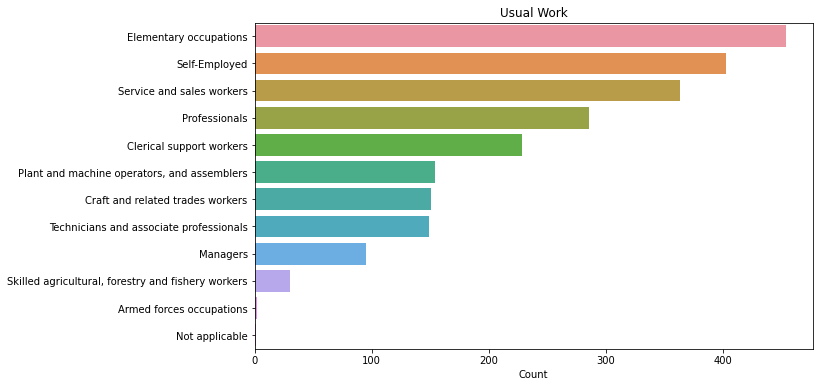

In [26]:
#We only want to look at respondents who were employed and who answered the question of what work do they usually do
answered_usual_work = lbdf[(lbdf['usual_work']!='Not Employed')&(lbdf['usual_work']!='Unknown')]

#Histogram of Usual Work letting us examine the distribution
usual_work = answered_usual_work['usual_work'].value_counts().sort_values(ascending=False)

#Plotting the Histogram 
plt.figure(figsize=(10,6))
sns.barplot(y = usual_work.index, x = usual_work.values)
plt.xlabel('Count')
plt.title("Usual Work")
plt.show()

# OTHER NEW

In [27]:


# display(lbdf.loc[lbdf['labour_in_feb']==0 ,['take_home_pay_feb']])
# display(lbdf.loc[lbdf['labour_in_apr']==0 ,['take_home_pay_feb', 'last_monthly_pay_apr']])


# lbdf.loc[lbdf['take_home_pay_apr']!=0, ['take_home_pay_apr']].value_counts

# df_new = lbdf.loc[(lbdf['kept_labour']==1) & (lbdf['take_home_pay_feb'].notna()) & (lbdf['take_home_pay_apr'].notna())]
# df_new = lbdf.loc[(lbdf['take_home_pay_feb']!=0) & (lbdf['take_home_pay_apr']!=0)]


# display(len())
# display(len(lbdf.loc[lbdf['kept_labour']==1,'take_home_pay_apr'].notna()))
# display(len(lbdf.loc[lbdf['kept_labour']==1,'last_monthly_pay_apr'].notna()))


# display(lbdf.loc[lbdf['kept_labour']==1,['take_home_pay_feb', 'take_home_pay_apr', 'last_monthly_pay_apr']])


From this we can deduce that, of the respondents in our sample who work and who answered this question, majority of them work in Elementary Occupations, are self-employed or work in Services and Sales.

In [28]:
# df_new = lbdf.loc[(lbdf['kept_labour']==1) & (lbdf['take_home_pay_feb'].notna()) & (lbdf['take_home_pay_apr'].notna()) & (lbdf['last_monthly_pay_apr'].notna()) & (lbdf['take_home_pay_feb']!=0) & (lbdf['take_home_pay_apr']!=0) & (lbdf['last_monthly_pay_apr']!=0) ]

#All not NaN and !=0
# df_labourincome = lbdf.loc[(lbdf['kept_labour']==1) & (lbdf['take_home_pay_feb'].notna())  & (lbdf['last_monthly_pay_apr'].notna()) & (lbdf['take_home_pay_feb']!=0) & (lbdf['last_monthly_pay_apr']!=0) ]


# All not NaN
df_labourincome = lbdf.loc[(lbdf['kept_labour']==1) & (lbdf['take_home_pay_feb'].notna())  & (lbdf['take_home_pay_apr'].notna())]

df_labourincome

,labour_in_feb,work_days_feb,work_hours_feb,take_home_pay_feb,labour_in_apr,work_days_apr,work_hours_apr,take_home_pay_apr,lost_labour,kept_labour,return_to_work,usual_work
15,1,5.0,8.0,25000.0,1,5.0,9.0,25000.0,0,1,1,Technicians and associate professionals
20,1,4.0,6.0,3500.0,1,4.0,6.0,3500.0,0,1,1,Technicians and associate professionals
21,1,5.0,7.0,7000.0,1,NaN,NaN,7000.0,0,1,1,Professionals
31,1,3.0,4.0,1900.0,1,2.0,9.0,600.0,0,1,1,Elementary occupations
41,1,7.0,12.0,4600.0,1,7.0,12.0,4600.0,0,1,1,Professionals
...,...,...,...,...,...,...,...,...,...,...,...,...
7016,1,4.0,12.0,4400.0,1,4.0,12.0,4500.0,0,1,1,Service and sales workers
7018,1,5.0,8.0,24000.0,1,2.0,4.0,12000.0,0,1,1,Professionals
7021,1,6.0,9.0,1500.0,1,5.0,8.0,2800.0,0,1,1,Unknown
7032,1,5.0,5.0,4000.0,1,5.0,6.0,4000.0,0,1,1,"Skilled agricultural, forestry and fishery wor..."


In [29]:
df_income = df_labourincome[['take_home_pay_feb', 'take_home_pay_apr']]
# df_income[['take_home_pay_feb', 'last_monthly_pay_apr']] = df_income[['take_home_pay_feb', 'last_monthly_pay_apr']].apply(pd.to_numeric)
df_income[['take_home_pay_feb', 'take_home_pay_apr']] = df_income[['take_home_pay_feb', 'take_home_pay_apr']].astype(float)

df_income['Difference'] = df_income['take_home_pay_apr'] - df_income['take_home_pay_feb']
df_income

/home/dinoanasta/.local/lib/python3.8/site-packages/pandas/core/frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-29-f8acb2504dc6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_income['Difference'] = df_income['take_home_pay_apr'] - df_income['take_home_pay_feb']


,take_home_pay_feb,take_home_pay_apr,Difference
15,25000.0,25000.0,0.0
20,3500.0,3500.0,0.0
21,7000.0,7000.0,0.0
31,1900.0,600.0,-1300.0
41,4600.0,4600.0,0.0
...,...,...,...
7016,4400.0,4500.0,100.0
7018,24000.0,12000.0,-12000.0
7021,1500.0,2800.0,1300.0
7032,4000.0,4000.0,0.0


In [30]:
df_income[df_income['Difference']==0]

,take_home_pay_feb,take_home_pay_apr,Difference
15,25000.0,25000.0,0.0
20,3500.0,3500.0,0.0
21,7000.0,7000.0,0.0
41,4600.0,4600.0,0.0
53,6500.0,6500.0,0.0
...,...,...,...
6981,3600.0,3600.0,0.0
6983,11000.0,11000.0,0.0
7001,3200.0,3200.0,0.0
7032,4000.0,4000.0,0.0


In [31]:
df_income[df_income['Difference']!=0]

,take_home_pay_feb,take_home_pay_apr,Difference
31,1900.0,600.0,-1300.0
44,4000.0,4200.0,200.0
45,3500.0,7200.0,3700.0
69,9000.0,6000.0,-3000.0
88,2000.0,4350.0,2350.0
...,...,...,...
6928,8300.0,10800.0,2500.0
6982,5200.0,5300.0,100.0
7016,4400.0,4500.0,100.0
7018,24000.0,12000.0,-12000.0


### **EXPORTING** - added after part 1 submission

In [32]:
lbdf.to_csv(r'Labour.csv', index = False)